In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('visitors.csv', encoding= 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


In [59]:
df.head()

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample,year quarter
0,2002,Q1,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5,2002Q1
1,2002,Q1,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19,2002Q1
2,2002,Q1,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3,2002Q1
3,2002,Q1,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1,2002Q1
4,2002,Q1,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1,2002Q1


In [5]:
df.dur_stay.value_counts()

1-3  nights    19710
4-7  nights    17525
8-14 nights    12819
15+  nights    11408
Name: dur_stay, dtype: int64

In [6]:
df.market.value_counts()

France         2611
USA            2498
Germany        2206
Netherlands    1957
Australia      1943
               ... 
Bahrain         268
Indonesia       254
Chile           242
Oman            219
Serbia          171
Name: market, Length: 62, dtype: int64

# How much was money was spend per year?

Text(0.5, 1.0, 'Pounds spend by year (millions)')

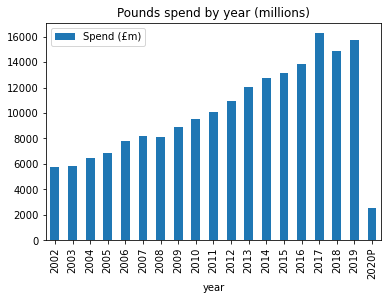

In [7]:
df_year_spend = df[['year', 'Spend (£m)']]
df_year_spend = df_year_spend.groupby(by=df_year_spend['year']).sum()

g = df_year_spend.plot.bar()
g.set_title('Pounds spend by year (millions)')

# How much was money was spend per quarter?

Text(0.5, 1.0, 'Pounds spend by year and quarter (millions)')

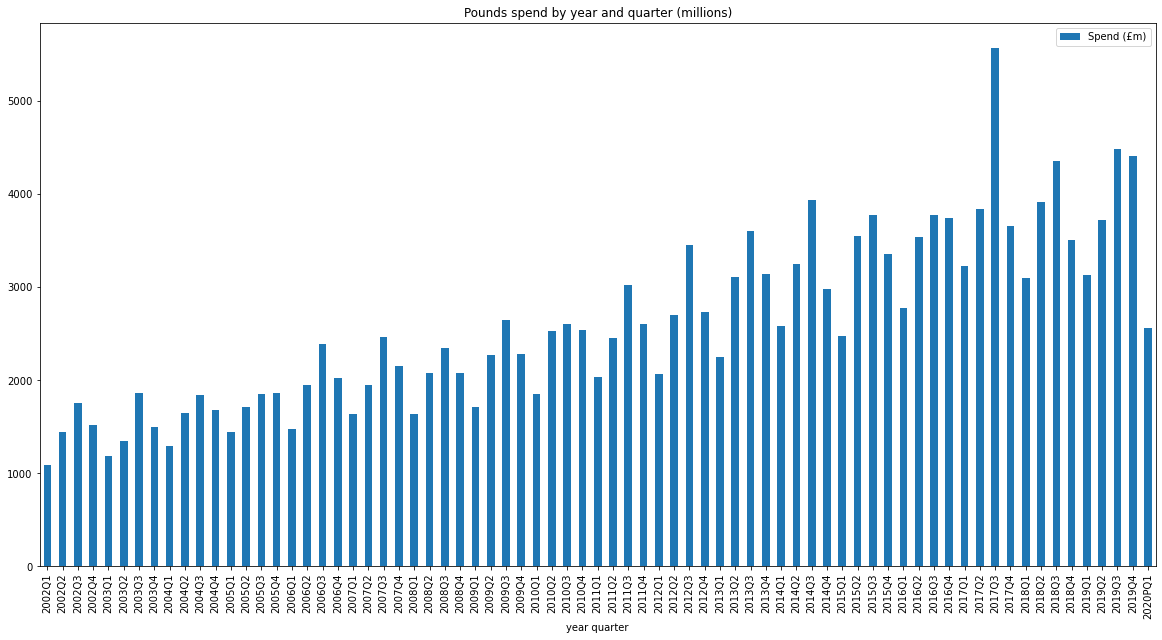

In [8]:
df['quarter'] = df['quarter'].replace(['January-March'],'Q1')
df['quarter'] = df['quarter'].replace(['April-June'],'Q2')
df['quarter'] = df['quarter'].replace(['July-September'],'Q3')
df['quarter'] = df['quarter'].replace(['October-December'],'Q4')
df['year quarter'] = df['year'] + df['quarter']

df_quarter = df[['year quarter', 'Spend (£m)']]
df_quarter = df_quarter.groupby(by=df_quarter['year quarter']).sum()

g = df_quarter.plot.bar(figsize = (20,10))
g.set_title('Pounds spend by year and quarter (millions)')

# How much did the spending increase year to year?

Text(0.5, 1.0, 'Pounds spend by year (millions)')

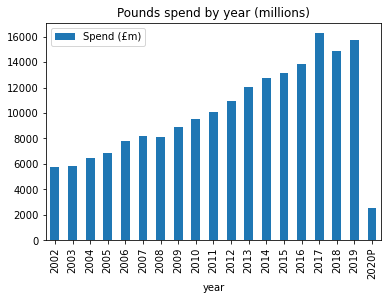

In [9]:
df_year_spend = df[['year', 'Spend (£m)']]
df_year_spend = df_year_spend.groupby(by=df_year_spend['year']).sum()

g = df_year_spend.plot(kind = 'bar')
g.set_title('Pounds spend by year (millions)')

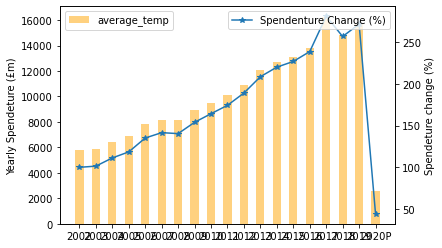

In [10]:
df_year_spend['Spend % Change'] = df_year_spend['Spend (£m)'] / df_year_spend['Spend (£m)'].iloc[0] * 100

df_year_spend.reset_index(inplace = True)

# Create figure and axis #1

fig, ax1 = plt.subplots()

# plot line chart on axis #1

ax1.bar(df_year_spend['year'], df_year_spend['Spend (£m)'], width=0.5, alpha=0.5, color='orange') 
ax1.set_ylabel('Yearly Spendeture (£m)')
ax1.legend(['average_temp'], loc="upper left")

# set up the 2nd axis

ax2 = ax1.twinx()

# plot bar chart on axis #2

ax2.plot(df_year_spend['year'], df_year_spend['Spend % Change'], marker = '*')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Spendeture change (%)')

ax2.legend(['Spendenture Change (%)'], loc="upper right")

plt.show()

In [32]:
df['dur_stay'].value_counts()

1-3  nights    19710
4-7  nights    17525
8-14 nights    12819
15+  nights    11408
Name: dur_stay, dtype: int64

<AxesSubplot:xlabel='year,dur_stay'>

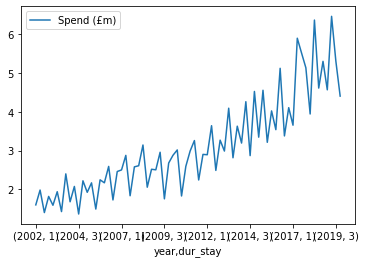

In [57]:
df2 = df[['Spend (£m)', 'year', 'dur_stay']]
df2 = df2[df2['year'] != '2020P'] 

#df2 = df2[df['year'] <= '2002']

df2['dur_stay'] = df2['dur_stay'].replace(['1-3  nights'],'1')
df2['dur_stay'] = df2['dur_stay'].replace(['4-7  nights'],'2')
df2['dur_stay'] = df2['dur_stay'].replace(['8-14 nights'],'3')
df2['dur_stay'] = df2['dur_stay'].replace(['15+  nights'],'4')

df2 = df2.set_index('year')

df2 = df2.groupby(['year', 'dur_stay']).mean()


df2.plot()

# In which quarter did spending increase the most?

C:\Users\ulrik\AppData\Local\Temp/ipykernel_16280/1447821484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q1['Spend % Change'] = df_Q1['Spend (£m)'] / df_Q1['Spend (£m)'].iloc[0] * 100
C:\Users\ulrik\AppData\Local\Temp/ipykernel_16280/1447821484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q2['Spend % Change'] = df_Q2['Spend (£m)'] / df_Q2['Spend (£m)'].iloc[0] * 100
C:\Users\ulrik\AppData\Local\Temp/ipykernel_16280/1447821484.py:13: SettingWithCopyWarning: 
A value is trying to be set

[[Text(0, 20.0, ''),
  Text(0, 40.0, ''),
  Text(0, 60.0, ''),
  Text(0, 80.0, ''),
  Text(0, 100.0, ''),
  Text(0, 120.0, ''),
  Text(0, 140.0, ''),
  Text(0, 160.0, ''),
  Text(0, 180.0, ''),
  Text(0, 200.0, '')]]

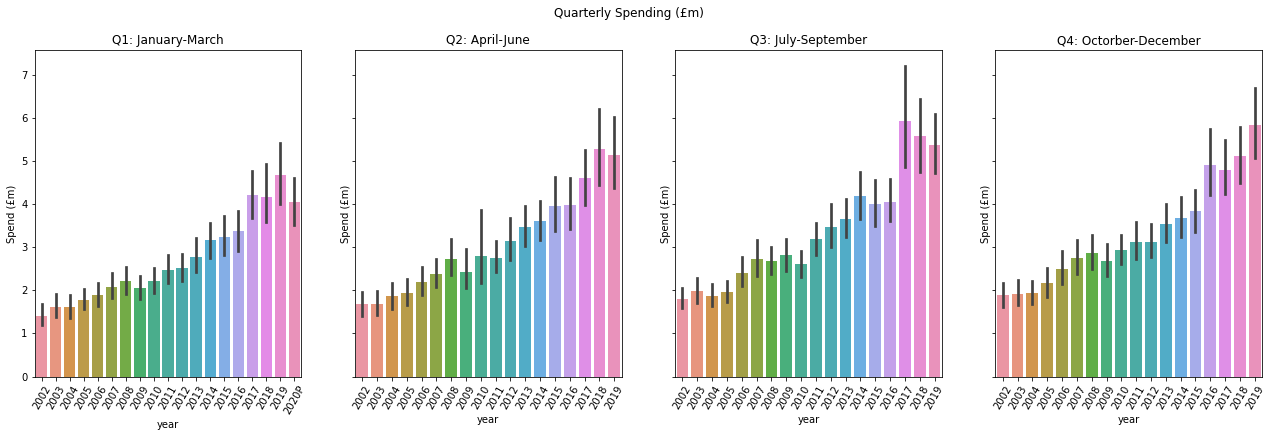

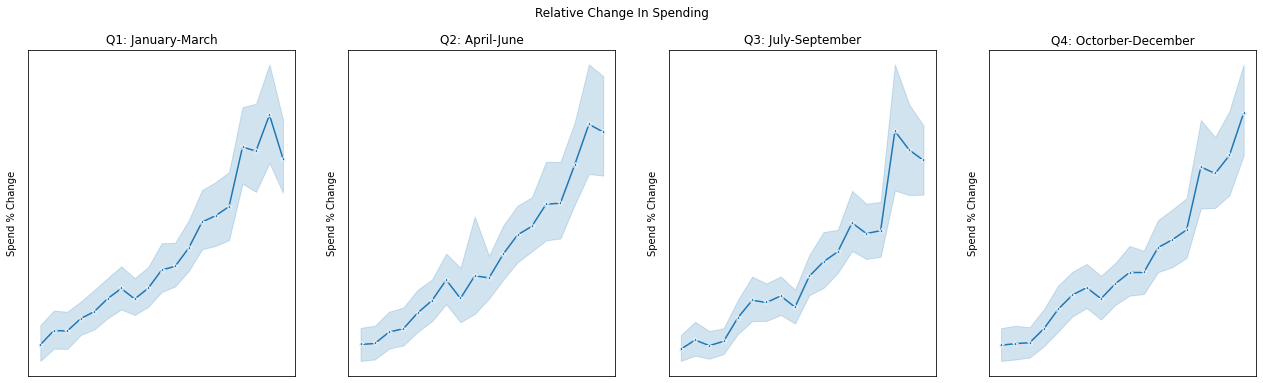

In [12]:
df['quarter'] = df['quarter'].replace(['January-March'],'Q1')
df['quarter'] = df['quarter'].replace(['April-June'],'Q2')
df['quarter'] = df['quarter'].replace(['July-September'],'Q3')
df['quarter'] = df['quarter'].replace(['October-December'],'Q4')

df_Q1 = df[df['quarter'] == 'Q1']
df_Q2 = df[df['quarter'] == 'Q2']
df_Q3 = df[df['quarter'] == 'Q3']
df_Q4 = df[df['quarter'] == 'Q4']

df_Q1['Spend % Change'] = df_Q1['Spend (£m)'] / df_Q1['Spend (£m)'].iloc[0] * 100
df_Q2['Spend % Change'] = df_Q2['Spend (£m)'] / df_Q2['Spend (£m)'].iloc[0] * 100
df_Q3['Spend % Change'] = df_Q3['Spend (£m)'] / df_Q3['Spend (£m)'].iloc[0] * 100
df_Q4['Spend % Change'] = df_Q4['Spend (£m)'] / df_Q4['Spend (£m)'].iloc[0] * 100

fig, axes = plt.subplots(1, 4, figsize=(22, 6), sharey=True)
fig.suptitle('Quarterly Spending (£m)')

sns.barplot(ax=axes[0], x=df_Q1['year'], y=df_Q1['Spend (£m)'])
axes[0].set_title('Q1: January-March')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[1], x=df_Q2['year'], y=df_Q2['Spend (£m)'])
axes[1].set_title('Q2: April-June')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[2], x=df_Q3['year'], y=df_Q3['Spend (£m)'])
axes[2].set_title('Q3: July-September')
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[3], x=df_Q4['year'], y=df_Q4['Spend (£m)'])
axes[3].set_title('Q4: Octorber-December')
axes[3].set_xticklabels(axes[3].get_xticklabels(),rotation = 60)

fig, axes = plt.subplots(1, 4, figsize=(22, 6), sharey=False)
fig.suptitle('Relative Change In Spending')

sns.lineplot(ax=axes[0], x=df_Q1['year'], y=df_Q1['Spend % Change'], marker = '*')
axes[0].set_title('Q1: January-March')
axes[0].set(xlabel=None)
axes[0].tick_params(bottom=False)
axes[0].set(xticklabels=[])
axes[0].tick_params(left=False)
axes[0].set(yticklabels=[])

sns.lineplot(ax=axes[1], x=df_Q2['year'], y=df_Q2['Spend % Change'], marker = '*')
axes[1].set_title('Q2: April-June')
axes[1].set(xlabel=None)
axes[1].tick_params(bottom=False)
axes[1].set(xticklabels=[])
axes[1].tick_params(left=False)
axes[1].set(yticklabels=[])

sns.lineplot(ax=axes[2], x=df_Q3['year'], y=df_Q3['Spend % Change'], marker = '*')
axes[2].set_title('Q3: July-September')
axes[2].set(xlabel=None)
axes[2].tick_params(bottom=False)
axes[2].set(xticklabels=[])
axes[2].tick_params(left=False)
axes[2].set(yticklabels=[])

sns.lineplot(ax=axes[3], x=df_Q4['year'], y=df_Q4['Spend % Change'], marker = '*')
axes[3].set_title('Q4: Octorber-December')
axes[3].set(xlabel=None)
axes[3].tick_params(bottom=False)
axes[3].set(xticklabels=[])
axes[3].tick_params(left=False)
axes[3].set(yticklabels=[])

# Which purpose spend the most money?

Text(0.5, 1.0, 'Pounds spend by purpose (millions)')

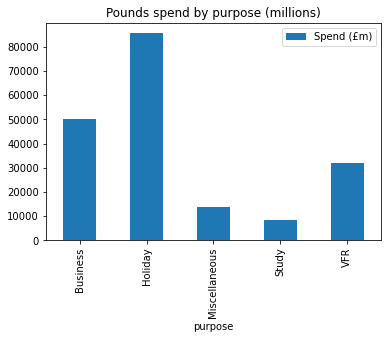

In [13]:
df_purp = df[['purpose', 'Spend (£m)']]

df_purp = df_purp.groupby(by=df_purp['purpose']).sum()

g = df_purp.plot.bar()
g.set_title('Pounds spend by purpose (millions)')

Text(0, 0.5, '')

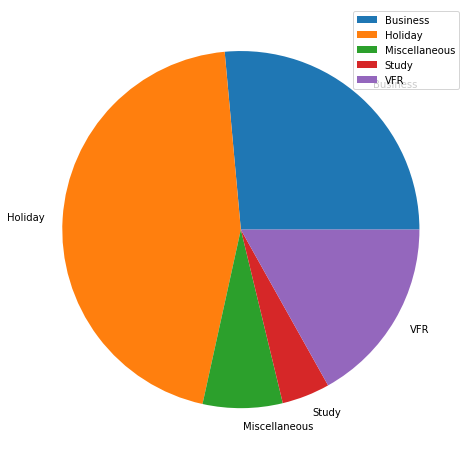

In [14]:
ax = df_purp.plot.pie(y = 'Spend (£m)', figsize=(8,13))
ax.set_xlabel('')
ax.set_ylabel('')

# When do people spend the most money?

# Did transportation methods change over the years?

In [15]:
df_mode = df[['year', 'mode']]

df_mode_air = df_mode[df_mode['mode'] == 'Air']
air = df_mode_air['mode'].value_counts()

df_mode_tunnel = df_mode[df_mode['mode'] == 'Tunnel']
tunnel = df_mode_tunnel['mode'].value_counts()

df_mode_sea = df_mode[df_mode['mode'] == 'Sea']
sea = df_mode_sea['mode'].value_counts()

In [16]:
year = df_mode['year'].value_counts()

air = df_mode_air['mode'].value_counts()

In [17]:
df_mode.groupby(by=df_mode['year'])

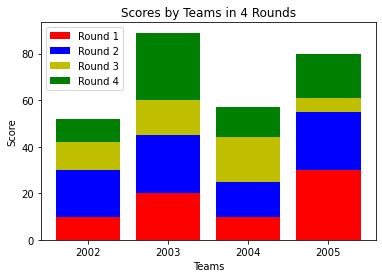

In [18]:
# create data
x = ['2002', '2003', '2004', '2005']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

# Predictive Analysis

## When does

Text(0.5, 1.0, 'Pounds spend by year (millions)')

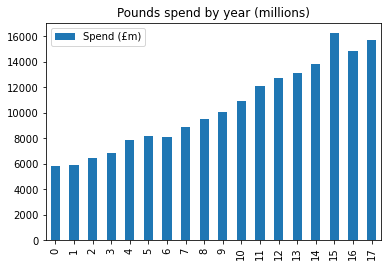

In [19]:
df_year_spend = df[['year', 'Spend (£m)']]
df_year_spend = df_year_spend.groupby(by=df_year_spend['year']).sum()
df_year_spend.reset_index(inplace = True)
df_year_spend = df_year_spend[df_year_spend['year'] != '2020P'] 

g = df_year_spend.plot(kind = 'bar')
g.set_title('Pounds spend by year (millions)')

<AxesSubplot:xlabel='year', ylabel='Spend (£m)'>

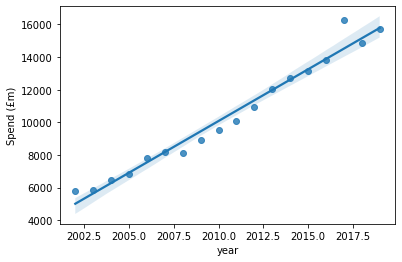

In [20]:
years = df_year_spend['year'].tolist()

spending = df_year_spend['Spend (£m)'].tolist()

df_year_spend['year'] = df_year_spend['year'].astype(str).astype(int)

sns.regplot(x='year',
            y='Spend (£m)',
            data=df_year_spend)

In [21]:
spending[-1]

15725.002242053

In [22]:
increase = (spending[-1] - spending[0]) / (years[-1] - years[0])

years2 = [2019, 2020, 2021, 2022, 2023, 2024]
spending2 = [spending[-1], spending[-1]+increase, spending[-1]+increase*2, spending[-1]+increase*3, spending[-1]+increase*4, spending[-1]+increase*5]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
sns.regplot(years2, spending2, ci=None)

In [ ]:
sns.regplot(x='year',
            y='Spend (£m)',
            data=df_year_spend)

sns.regplot(years2, spending2)

## How has purpose spending changed?

In [ ]:
df['purpose'].value_counts()

In [ ]:
df_purp_year = df[['purpose', 'year', 'Spend (£m)']]
df_purp_year = df_purp_year[df_purp_year['year'] != '2020P'] 
df_purp_year.groupby('year').sum()

df_holiday = df_purp_year[df_purp_year['purpose'] == 'Holiday']
df_vfr = df_purp_year[df_purp_year['purpose'] == 'VFR']
df_business = df_purp_year[df_purp_year['purpose'] == 'Business']
df_misc = df_purp_year[df_purp_year['purpose'] == 'Miscellaneous']
df_study = df_purp_year[df_purp_year['purpose'] == 'Study']

df_holiday = df_holiday.groupby('year').sum()
df_vfr = df_vfr.groupby('year').sum()
df_business = df_business.groupby('year').sum()
df_misc = df_misc.groupby('year').sum()
df_study = df_study.groupby('year').sum()

df_holiday.reset_index(inplace = True)
df_vfr.reset_index(inplace = True)
df_business.reset_index(inplace = True)
df_misc.reset_index(inplace = True)
df_study.reset_index(inplace = True)

df_holiday['Spend % Change'] = df_holiday['Spend (£m)'] / df_holiday['Spend (£m)'].iloc[0] * 100
df_vfr['Spend % Change'] = df_vfr['Spend (£m)'] / df_vfr['Spend (£m)'].iloc[0] * 100
df_business['Spend % Change'] = df_business['Spend (£m)'] / df_business['Spend (£m)'].iloc[0] * 100
df_misc['Spend % Change'] = df_misc['Spend (£m)'] / df_misc['Spend (£m)'].iloc[0] * 100
df_study['Spend % Change'] = df_study['Spend (£m)'] / df_study['Spend (£m)'].iloc[0] * 100

fig, axes = plt.subplots(1, 5, figsize=(22, 6), sharey=False)
fig.suptitle('Quarterly Spending (£m)')

sns.barplot(ax=axes[0], x=df_holiday['year'], y=df_holiday['Spend (£m)'])
axes[0].set_title('Holiday')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[1], x=df_vfr['year'], y=df_vfr['Spend (£m)'])
axes[1].set_title('VFR')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[2], x=df_business['year'], y=df_business['Spend (£m)'])
axes[2].set_title('Business')
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[3], x=df_misc['year'], y=df_misc['Spend (£m)'])
axes[3].set_title('Miscellaneous')
axes[3].set_xticklabels(axes[3].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[4], x=df_study['year'], y=df_study['Spend (£m)'])
axes[4].set_title('Study')
axes[4].set_xticklabels(axes[4].get_xticklabels(),rotation = 60)

fig, axes = plt.subplots(1, 5, figsize=(22, 6), sharey=False)
fig.suptitle('Relative Change In Spending')

sns.lineplot(ax=axes[0], x=df_holiday['year'], y=df_holiday['Spend % Change'], marker = '*')
axes[0].set_title('Holiday')
axes[0].set(xlabel=None)
axes[0].tick_params(bottom=False)
axes[0].set(xticklabels=[])
axes[0].tick_params(left=False)
axes[0].set(yticklabels=[])

sns.lineplot(ax=axes[1], x=df_vfr['year'], y=df_vfr['Spend % Change'], marker = '*')
axes[1].set_title('VFR')
axes[1].set(xlabel=None)
axes[1].tick_params(bottom=False)
axes[1].set(xticklabels=[])
axes[1].tick_params(left=False)
axes[1].set(yticklabels=[])

sns.lineplot(ax=axes[2], x=df_business['year'], y=df_business['Spend % Change'], marker = '*')
axes[2].set_title('Business')
axes[2].set(xlabel=None)
axes[2].tick_params(bottom=False)
axes[2].set(xticklabels=[])
axes[2].tick_params(left=False)
axes[2].set(yticklabels=[])

sns.lineplot(ax=axes[3], x=df_misc['year'], y=df_misc['Spend % Change'], marker = '*')
axes[3].set_title('Miscellaneous')
axes[3].set(xlabel=None)
axes[3].tick_params(bottom=False)
axes[3].set(xticklabels=[])
axes[3].tick_params(left=False)
axes[3].set(yticklabels=[])

sns.lineplot(ax=axes[4], x=df_study['year'], y=df_study['Spend % Change'], marker = '*')
axes[4].set_title('Study')
axes[4].set(xlabel=None)
axes[4].tick_params(bottom=False)
axes[4].set(xticklabels=[])
axes[4].tick_params(left=False)
axes[4].set(yticklabels=[])

df_holiday['Spend Per Trip'] = df_holiday['Spend (£m)'] / len(df[df['purpose'] == 'Holiday'].index)

fig, axes = plt.subplots(1, 5, figsize=(22, 6), sharey=False)
fig.suptitle('Quarterly Spending (£m) Per Travel')

sns.barplot(ax=axes[0], x=df_holiday['year'], y=df_holiday['Spend (£m)'])
axes[0].set_title('Holiday')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[1], x=df_vfr['year'], y=df_vfr['Spend (£m)'])
axes[1].set_title('VFR')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[2], x=df_business['year'], y=df_business['Spend (£m)'])
axes[2].set_title('Business')
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[3], x=df_misc['year'], y=df_misc['Spend (£m)'])
axes[3].set_title('Miscellaneous')
axes[3].set_xticklabels(axes[3].get_xticklabels(),rotation = 60)

sns.barplot(ax=axes[4], x=df_study['year'], y=df_study['Spend (£m)'])
axes[4].set_title('Study')
axes[4].set_xticklabels(axes[4].get_xticklabels(),rotation = 60)

In [ ]:
df_holiday['Spend Per Trip'] = df_holiday['Spend (£m)'] / len(df[df['purpose'] == 'Holiday'].index)


In [ ]:
len(df[df['purpose'] == 'Holiday'].index)

In [ ]:
df_holiday